In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

# Load the dataset
df = pd.read_csv('C:\YULU.txt')
df


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Check the structure and characteristics of the dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# check outliers

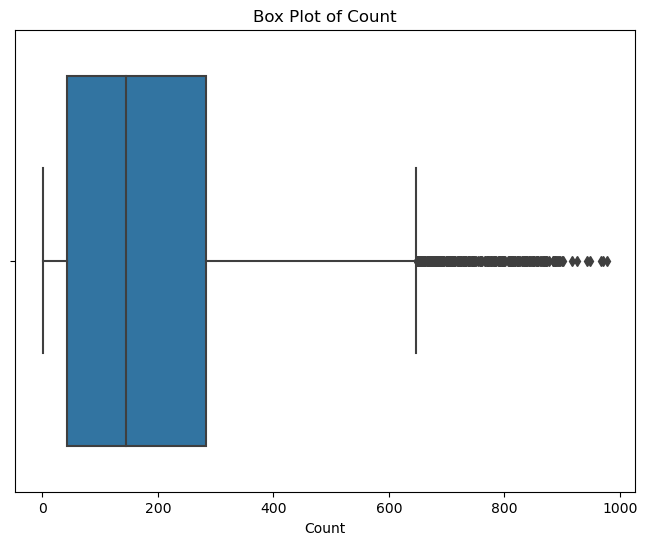

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['count'])
plt.title('Box Plot of Count')
plt.xlabel('Count')
plt.show()

# Removing the outliers

In [56]:

z_scores = np.abs(stats.zscore(df['count']))


threshold = 3


df = df.loc[(z_scores < threshold)]


print(df.shape)

(10664, 12)


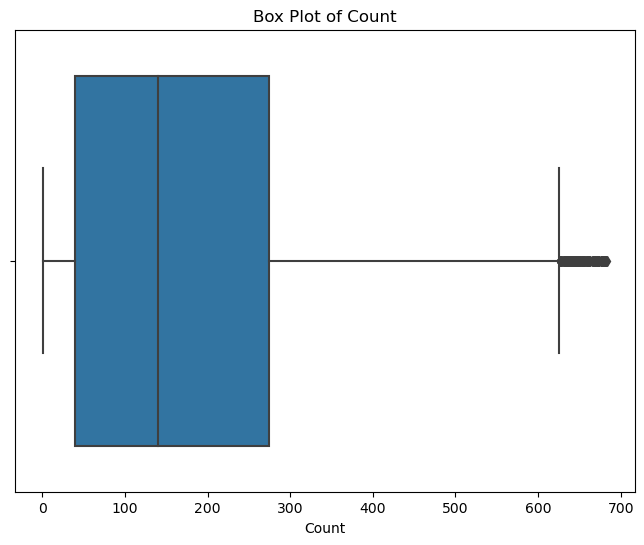

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['count'])
plt.title('Box Plot of Count')
plt.xlabel('Count')
plt.show()

# Convert categorical attributes to 'category' data type

In [58]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [59]:
print(df.describe())

               temp         atemp      humidity     windspeed        casual  \
count  10664.000000  10664.000000  10664.000000  10664.000000  10664.000000   
mean      20.097228     23.512282     62.107464     12.782272     34.614779   
std        7.779856      8.466723     19.238272      8.175401     48.323047   
min        0.820000      0.760000      0.000000      0.000000      0.000000   
25%       13.940000     16.665000     47.000000      7.001500      4.000000   
50%       20.500000     24.240000     62.000000     12.998000     16.000000   
75%       26.240000     31.060000     78.000000     16.997900     46.000000   
max       41.000000     45.455000    100.000000     56.996900    357.000000   

         registered         count  
count  10664.000000  10664.000000  
mean     144.695705    179.310484  
std      131.425135    161.316713  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    140.000000  
75%      214.000000    274.000000  


# Check for missing values


In [60]:
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


# Perform univariate analysis


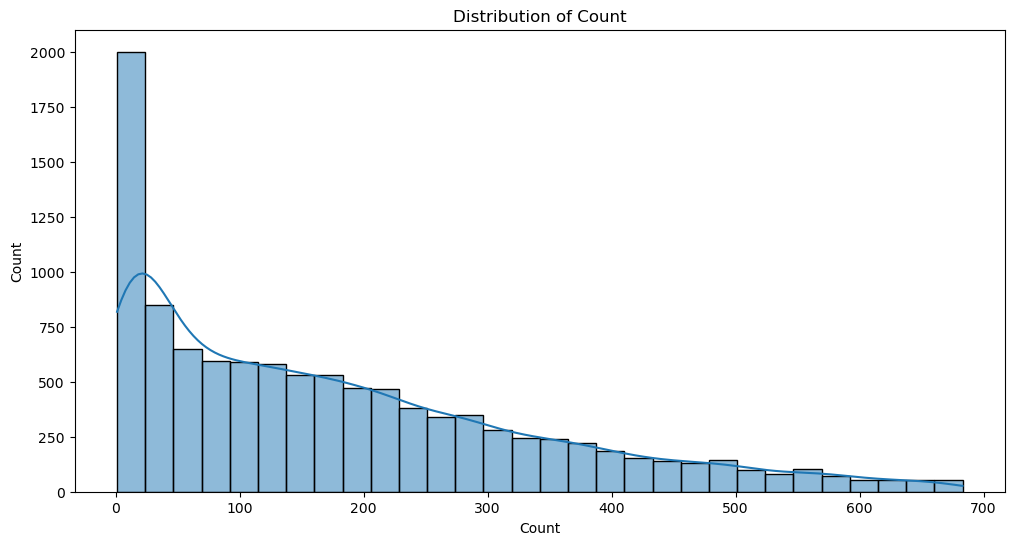

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(df['count'], bins=30, kde=True)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.show()

# Barplot for categorical variables


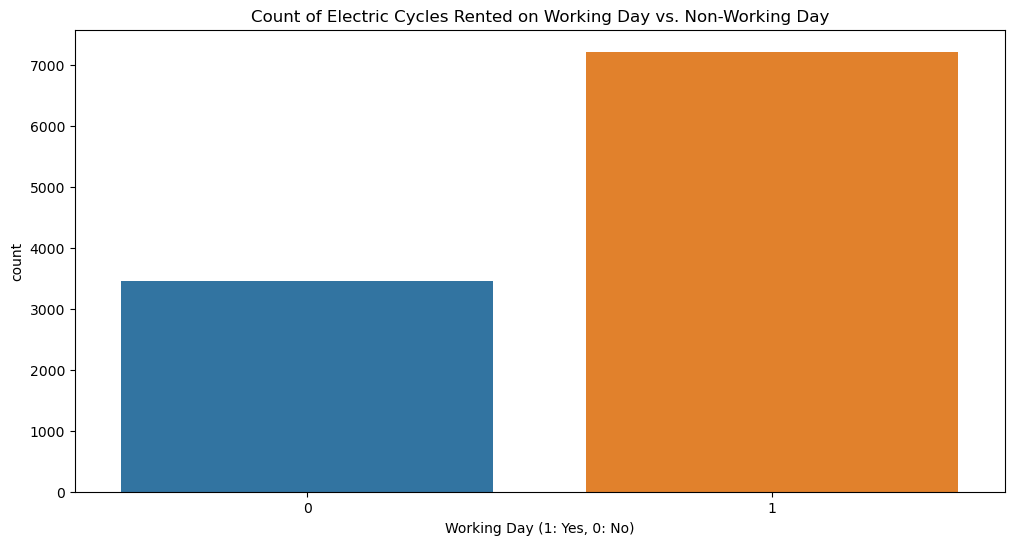

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(x='workingday', data=df)
plt.title('Count of Electric Cycles Rented on Working Day vs. Non-Working Day')
plt.xlabel('Working Day (1: Yes, 0: No)')
plt.show()

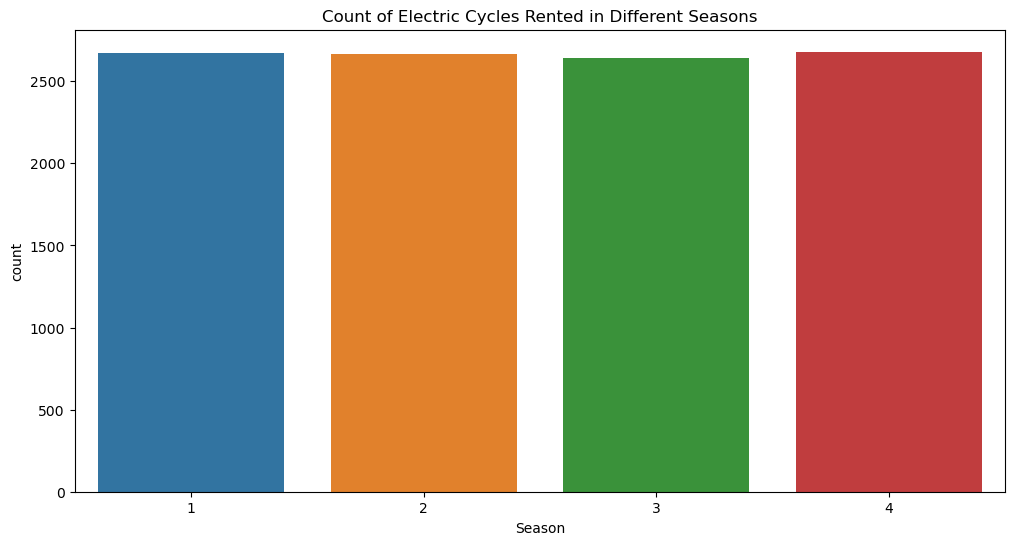

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=df)
plt.title('Count of Electric Cycles Rented in Different Seasons')
plt.xlabel('Season')
plt.show()

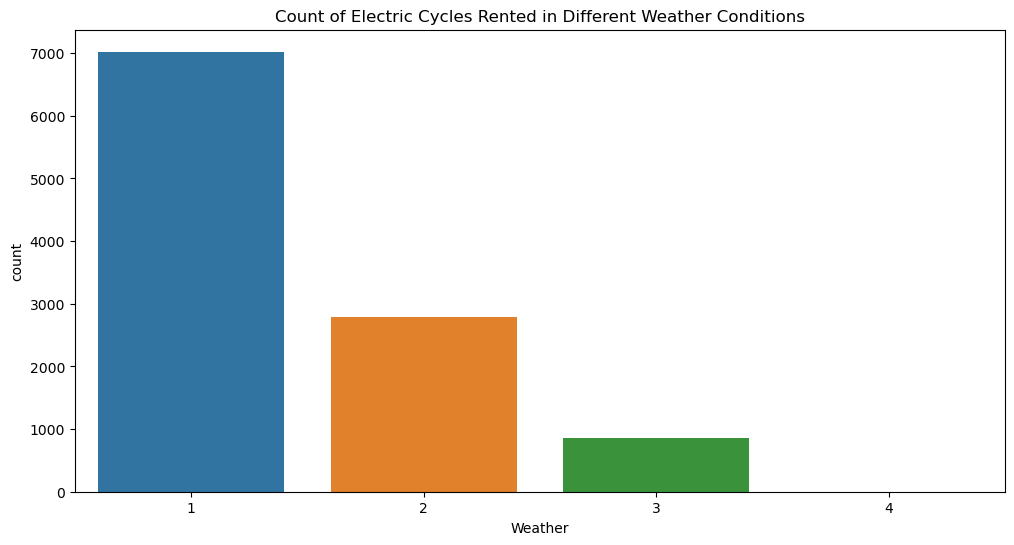

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weather', data=df)
plt.title('Count of Electric Cycles Rented in Different Weather Conditions')
plt.xlabel('Weather')
plt.show()

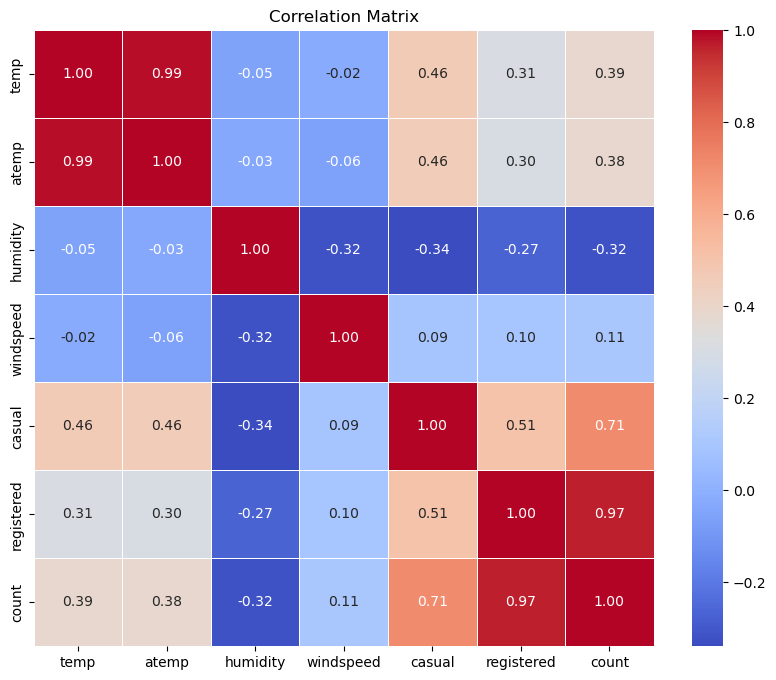

In [65]:
correlation_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

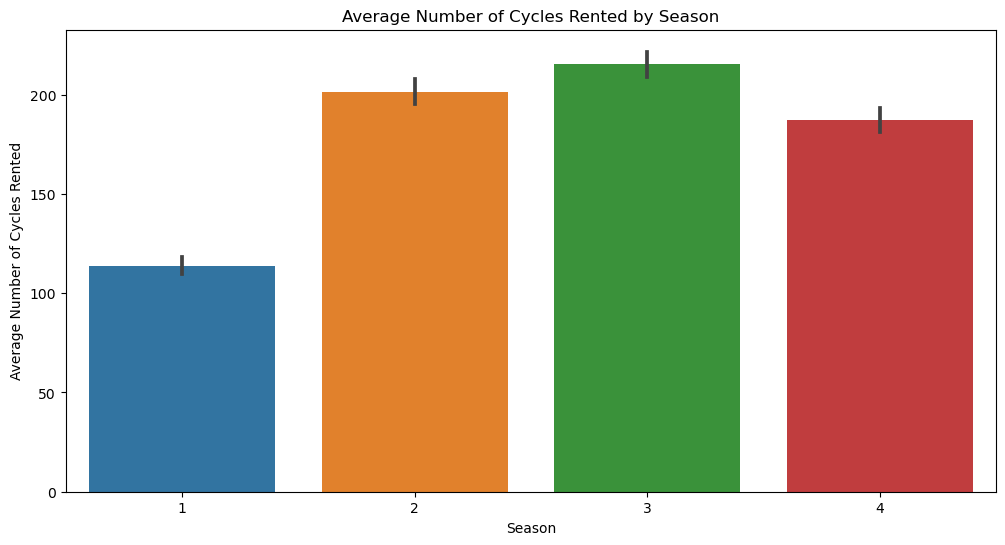

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', data=df)
plt.title('Average Number of Cycles Rented by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Cycles Rented')
plt.show()

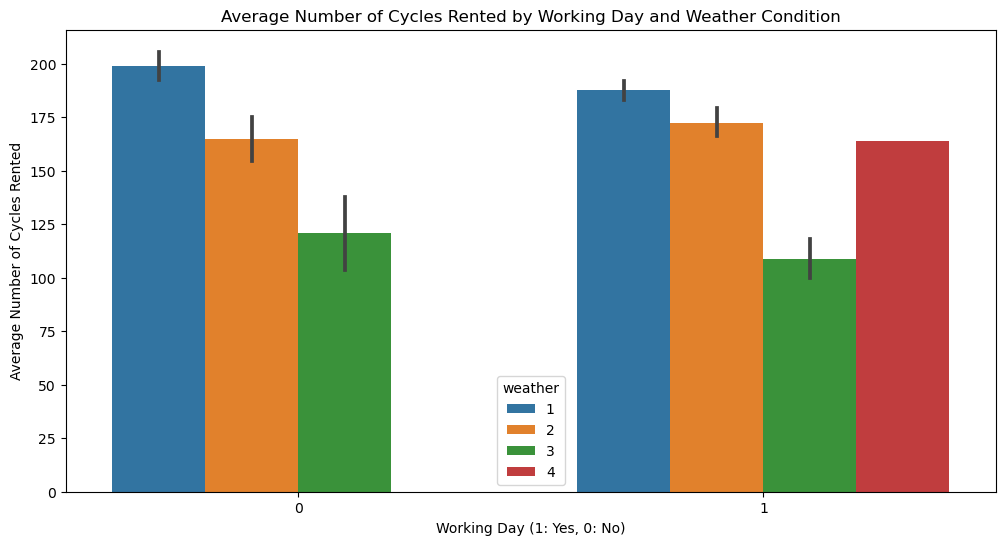

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x='workingday', y='count', hue='weather', data=df)
plt.title('Average Number of Cycles Rented by Working Day and Weather Condition')
plt.xlabel('Working Day (1: Yes, 0: No)')
plt.ylabel('Average Number of Cycles Rented')
plt.show()

# 2-sample t-test to check if Working Day has an effect on the number of electric cycles rented



In [68]:
working_day_count = df[df['workingday'] == 1]['count']
non_working_day_count = df[df['workingday'] == 0]['count']

t_stat, p_value = ttest_ind(working_day_count, non_working_day_count)
alpha = 0.05

print('2-Sample T-Test Results:')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the Null Hypothesis (H0): Working Day has a significant effect on the number of electric cycles rented.")
else:
    print("Fail to reject the Null Hypothesis (H0): Working Day does not have a significant effect on the number of electric cycles rented.")




2-Sample T-Test Results:
T-statistic: -2.464372722366331
P-value: 0.013740986283944313
Reject the Null Hypothesis (H0): Working Day has a significant effect on the number of electric cycles rented.


# Chi-square test to check if Weather is dependent on the season

In [69]:
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(pd.crosstab(df['season'], df['weather']))

print('Chi-Square Test Results:')
print(f'Chi-square statistic: {chi2_stat}')
print(f'P-value: {p_value_chi2}')

if p_value_chi2 < alpha:
    print("Reject the Null Hypothesis (H0): Weather is dependent on the season.")
else:
    print("Fail to reject the Null Hypothesis (H0): Weather is not dependent on the season.")

Chi-Square Test Results:
Chi-square statistic: 45.895125235596126
P-value: 6.298128960295697e-07
Reject the Null Hypothesis (H0): Weather is dependent on the season.


# ANOVA to check if No. of cycles rented is similar or different in different weather and season

In [70]:
anova_season = df[['season', 'count']].groupby('season').mean()
anova_weather = df[['weather', 'count']].groupby('weather').mean()

f_stat_season, p_value_season = f_oneway(df['count'][df['season'] == 1],
                                        df['count'][df['season'] == 2],
                                        df['count'][df['season'] == 3],
                                        df['count'][df['season'] == 4])

f_stat_weather, p_value_weather = f_oneway(df['count'][df['weather'] == 1],
                                          df['count'][df['weather'] == 2],
                                          df['count'][df['weather'] == 3],
                                          df['count'][df['weather'] == 4])

print('ANOVA Results for Season:')
print(f'F-statistic: {f_stat_season}')
print(f'P-value: {p_value_season}')

print('ANOVA Results for Weather:')
print(f'F-statistic: {f_stat_weather}')
print(f'P-value: {p_value_weather}')

if p_value_season < alpha:
    print("Reject the Null Hypothesis (H0): No. of cycles rented is different in different seasons.")
else:
    print("Fail to reject the Null Hypothesis (H0): No. of cycles rented is similar in different seasons.")

if p_value_weather < alpha:
    print("Reject the Null Hypothesis (H0): No. of cycles rented is different in different weather conditions.")
else:
    print("Fail to reject the Null Hypothesis (H0): No. of cycles rented is similar in different weather conditions.")



ANOVA Results for Season:
F-statistic: 222.44755844502163
P-value: 5.559835482661932e-140
ANOVA Results for Weather:
F-statistic: 66.92550192453614
P-value: 7.225193298161088e-43
Reject the Null Hypothesis (H0): No. of cycles rented is different in different seasons.
Reject the Null Hypothesis (H0): No. of cycles rented is different in different weather conditions.


# 2-sample t-test to check if the temperature has an effect on the number of electric cycles rented

In [71]:

high_temp_count = df[df['temp'] >= 30]['count']
low_temp_count = df[df['temp'] < 30]['count']

t_stat_temp, p_value_temp = ttest_ind(high_temp_count, low_temp_count)
alpha = 0.05

print('2-Sample T-Test Results for Temperature:')
print(f'T-statistic: {t_stat_temp}')
print(f'P-value: {p_value_temp}')

if p_value_temp < alpha:
    print("Reject the Null Hypothesis (H0): Temperature has a significant effect on the number of electric cycles rented.")
else:
    print("Fail to reject the Null Hypothesis (H0): Temperature does not have a significant effect on the number of electric cycles rented.")


2-Sample T-Test Results for Temperature:
T-statistic: 30.967548477419932
P-value: 1.062532103747117e-201
Reject the Null Hypothesis (H0): Temperature has a significant effect on the number of electric cycles rented.


# Insights and Recommendations:

Based on the analysis, draw conclusions about the significant variables that predict the demand for shared electric cycles in the Indian market.